<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/CA_PCA_Analysis_SupersetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**

Dimensionality Reduction using PCA on CA Superset timeseries data


## Mount Google drive

In [77]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

 CA_alldatasets_Feb05.csv
 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb05.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb06.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_combined_Feb04.csv
 CA_CovidDataJan10.csv
 CA_dataset_Feb11.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb05.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb06.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Feb04.csv
 CA_processedMarylandData_Feb05.csv
 CA_processedMarylandData_Feb12.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 CA_socialDistancingInertiaData_Feb04.csv
 CA_Superset_dataset_Feb12.csv
 computed_CA_mobility_data.csv
 data-mask_for_all.csv
 election_results_2021.csv
 maryland_inertia_data_allstates_Feb04.csv
 maryland_inertia_data_allstates_Feb05.csv
 maryland_inertia_data_allstates_Feb12.csv
 maryland_inertia_data_allstates_Jan11.csv
 maryland_inertia_raw_dec28_2020.csv
 Mask_Rule_Feb05.cs

# Import library

In [ ]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

import seaborn as sns


# Load Superset data

In [76]:
CA_superset_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_SuperData_Labeled_CDCGuideline_Feb13.csv',low_memory=False)
CA_superset_data.head()

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New cases/100k,positivity_rate,rolling_avg_new_cases/100k,growth_label
0,2020-03-01,California,6001,0,Alameda County,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,California,CA,6001,Alameda County,6,37,26,2.93,25.4,0.4,36.8,0.25,2.68,0,1666753,-5.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0000,0.0,37,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00,0.000000,0.000,0.0,minimal
1,2020-03-02,California,6001,0,Alameda County,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,California,CA,6001,Alameda County,6,17,20,3.38,28.2,0.4,38.1,0.63,2.74,0,1666753,-2.9,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0000,0.0,38,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00,0.000000,0.000,0.0,minimal
2,2020-03-03,California,6001,1,Alameda County,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075,California,CA,6001,Alameda County,6,16,18,3.61,27.1,0.3,32.7,0.67,2.94,1,1666753,4.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0002,0.0,0,54.0,0.0,0.00,0.0,0,1,0.05,42,1.1,5.3,5.7,0.6,0.00,0.059997,0.000,0.0,minimal
3,2020-03-04,California,6001,0,Alameda County,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075,California,CA,6001,Alameda County,6,14,18,3.55,27.9,0.3,36.9,0.68,2.87,0,1666753,1.7,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04,0.000000,0.002,0.0,minimal
4,2020-03-05,California,6001,0,Alameda County,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075,California,CA,6001,Alameda County,6,15,19,3.54,28.1,0.3,36.8,0.66,2.88,0,1666753,2.0,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04,0.000000,0.002,0.0,minimal


In [104]:
CA_superset_data['growth_code'] = CA_superset_data['growth_label'].astype('category').cat.codes
CA_superset_data.head(2)

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New cases/100k,positivity_rate,rolling_avg_new_cases/100k,growth_label,growth_code
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,California,6001,0,Alameda County,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,California,CA,6001,Alameda County,6,37,26,2.93,25.4,0.4,36.8,0.25,2.68,0,1666753,-5.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0,0.0,37,54.0,0.0,0.0,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.0,0.0,0.0,0.0,minimal,0
2020-03-02,California,6001,0,Alameda County,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,California,CA,6001,Alameda County,6,17,20,3.38,28.2,0.4,38.1,0.63,2.74,0,1666753,-2.9,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0,0.0,38,54.0,0.0,0.0,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.0,0.0,0.0,0.0,minimal,0


In [78]:
print(CA_superset_data.shape)
print(CA_superset_data.Date.min())
print(CA_superset_data.Date.max())


(15391, 62)
2020-03-01
2020-12-28


## Factor Plot

In [ ]:
df_superset_data_filtered1 = CA_superset_data[(CA_superset_data['Date'] >= '2020-04-01') & (CA_superset_data['Date'] < '2020-07-01')]
print(df_superset_data_filtered1.shape)


(4761, 58)


In [ ]:
sns.factorplot(data = df_superset_data_filtered1, x = 'New.cases.1000.people', y = "m50_index", 
               #col = 'Promo', 
               row = 'FIPS',
               hue = 'FIPS',
               palette = 'RdPu') 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9b4ca43a60> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f9b4c770048> (for post_execute):


KeyboardInterrupt: ignored

## Preprocessing: Convert 'date' as index column before applying PCA

In [79]:
CA_superset_data['Date'] = pd.to_datetime(CA_superset_data['Date'], format='%Y-%m-%d') 


In [80]:
CA_superset_data = CA_superset_data.set_index('Date')
CA_superset_data.head()

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New cases/100k,positivity_rate,rolling_avg_new_cases/100k,growth_label
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,California,6001,0,Alameda County,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,California,CA,6001,Alameda County,6,37,26,2.93,25.4,0.4,36.8,0.25,2.68,0,1666753,-5.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0000,0.0,37,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00,0.000000,0.000,0.0,minimal
2020-03-02,California,6001,0,Alameda County,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,California,CA,6001,Alameda County,6,17,20,3.38,28.2,0.4,38.1,0.63,2.74,0,1666753,-2.9,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0000,0.0,38,54.0,0.0,0.00,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.00,0.000000,0.000,0.0,minimal
2020-03-03,California,6001,1,Alameda County,0.0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,860.757075,California,CA,6001,Alameda County,6,16,18,3.61,27.1,0.3,32.7,0.67,2.94,1,1666753,4.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0002,0.0,0,54.0,0.0,0.00,0.0,0,1,0.05,42,1.1,5.3,5.7,0.6,0.00,0.059997,0.000,0.0,minimal
2020-03-04,California,6001,0,Alameda County,0.0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,860.757075,California,CA,6001,Alameda County,6,14,18,3.55,27.9,0.3,36.9,0.68,2.87,0,1666753,1.7,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04,0.000000,0.002,0.0,minimal
2020-03-05,California,6001,0,Alameda County,0.0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,860.757075,California,CA,6001,Alameda County,6,15,19,3.54,28.1,0.3,36.8,0.66,2.88,0,1666753,2.0,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0002,0.0,0,54.0,10.3,0.01,0.0,0,1,0.06,42,1.1,5.3,5.7,0.6,0.04,0.000000,0.002,0.0,minimal


## Group the data

In [81]:
CA_superset_data.columns

Index(['Province_State', 'FIPS', 'New cases', 'County Name',
       'mask_rule_severity', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'PopDensity', 'State_Name',
       'State', 'CTFIPS', 'CTNAME', 'STFIPS', 'Social.distancing.index',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person', 'New.COVID.cases', 'Population',
       'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Employment.density',
       'X..hot.spots.1000.people', 'Hospital.beds.1000.people',
   

In [82]:
x_col_demographics = ['FIPS','PopDensity','X..people.older.than.60',
                      'Median.income', 'X..African.Americans',
                      'X..Hispanic.Americans', 'X..Male','New cases/100k']

In [105]:
x_col_hospitalization_testing = ['Hospital.beds.1000.people',
       'ICUs.1000.people', 
       'X..hospital.bed.utilization',
       'Testing.capacity', 'Tests.done.1000.people', 'X..ICU.utilization',
       'Ventilator.shortage','positivity_rate',
       'rolling_avg_new_cases/100k'	,'growth_code','New cases/100k'] #'X..contact.tracing.workers.1000.people',

In [84]:
x_col_mobility = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person','X..working.from.home','New cases/100k']

In [85]:
x_col_socialdistancing = ['m50', 'm50_index','Social.distancing.index','New cases/100k']

In [86]:
x_col_maskrule = ['mask_rule_severity','New cases/100k']

# PCA: Demographic Group

In [87]:
CA_superset_data_filtered = CA_superset_data[x_col_demographics]
CA_superset_data_filtered.head()

,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New cases/100k
Date,,,,,,,,
2020-03-01,6001,860.757075,19,92574,10.5,22.5,49.11,0.000000
2020-03-02,6001,860.757075,19,92574,10.5,22.5,49.11,0.000000
2020-03-03,6001,860.757075,19,92574,10.5,22.5,49.11,0.059997
2020-03-04,6001,860.757075,19,92574,10.5,22.5,49.11,0.000000
2020-03-05,6001,860.757075,19,92574,10.5,22.5,49.11,0.000000


In [88]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(15391, 8)
(15391, 8)


## Correlation Plot

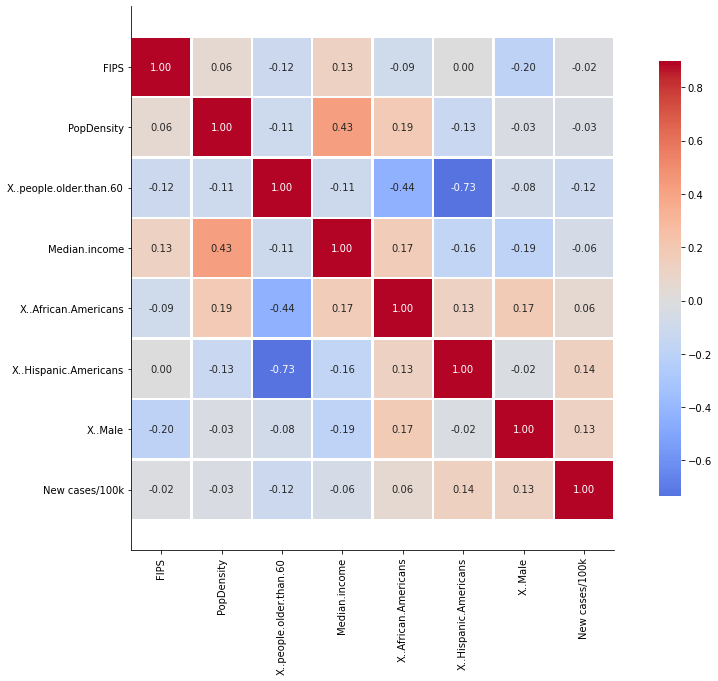

In [89]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [92]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [93]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

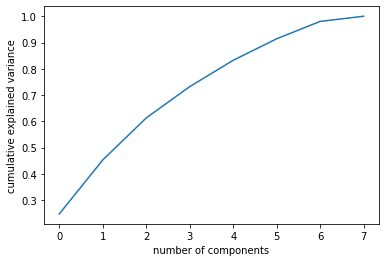

In [94]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [95]:
num_components = 6
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [96]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New cases/100k
0,0.030291,0.105343,-0.662973,0.071186,0.431909,0.551866,0.119670,0.194839
1,-0.248573,-0.574977,0.020228,-0.641000,-0.179780,0.251518,0.263639,0.176735
2,-0.537781,0.237536,0.144371,0.045993,0.386000,-0.325318,0.600465,0.126588
3,0.353557,0.080384,0.103737,0.070372,-0.155498,-0.133887,0.093139,0.895568
4,-0.702034,0.062578,0.050152,0.174881,-0.126530,0.175355,-0.569109,0.315418
5,0.094601,-0.571736,0.098279,0.075446,0.672914,-0.280972,-0.325517,0.105344


In [97]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [98]:
most_important_names

['X..people.older.than.60',
 'Median.income',
 'X..Male',
 'New cases/100k',
 'FIPS',
 'X..African.Americans']

In [99]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['FIPS', 'PopDensity', 'X..people.older.than.60', 'Median.income',
       'X..African.Americans', 'X..Hispanic.Americans', 'X..Male',
       'New cases/100k'],
      dtype='object')
most_important_names:  ['X..people.older.than.60', 'Median.income', 'X..Male', 'New cases/100k', 'FIPS', 'X..African.Americans']
2


# PCA: Hospitalization and testing  Group

In [106]:
CA_superset_data_filtered = CA_superset_data[x_col_hospitalization_testing]
CA_superset_data_filtered.head()

,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,positivity_rate,rolling_avg_new_cases/100k,growth_code,New cases/100k
Date,,,,,,,,,,,
2020-03-01,2.05,0.22,54.0,0.0,0.00,0.0,0,0.000,0.0,0,0.000000
2020-03-02,2.05,0.22,54.0,0.0,0.00,0.0,0,0.000,0.0,0,0.000000
2020-03-03,2.05,0.22,54.0,0.0,0.00,0.0,0,0.000,0.0,0,0.059997
2020-03-04,2.05,0.22,54.0,10.3,0.01,0.0,0,0.002,0.0,0,0.000000
2020-03-05,2.05,0.22,54.0,10.3,0.01,0.0,0,0.002,0.0,0,0.000000


In [107]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(15391, 11)
(15391, 11)


## Correlation Plot

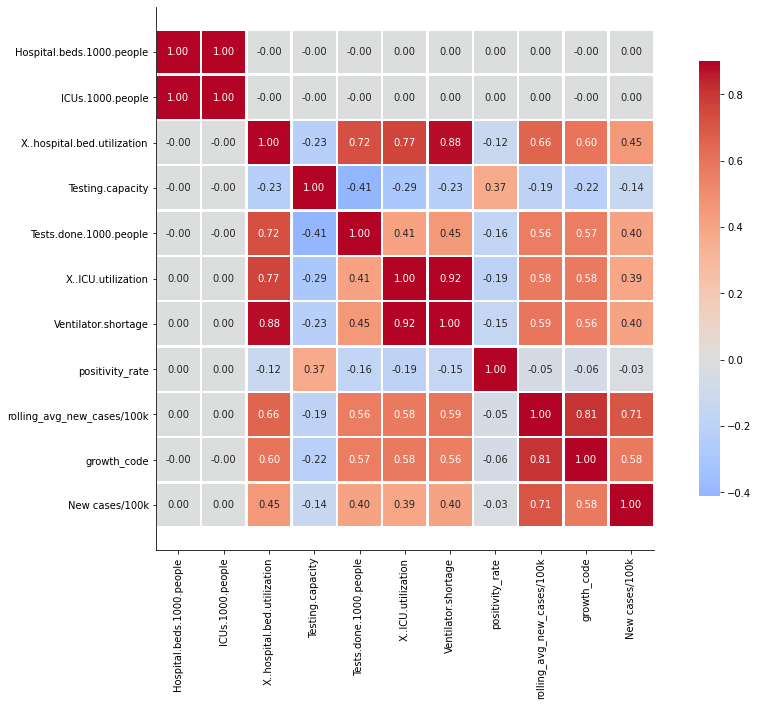

In [108]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [109]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [110]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

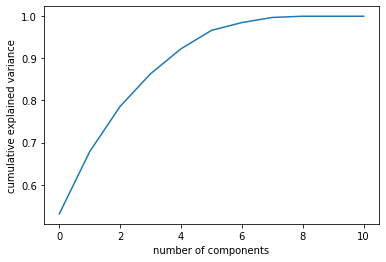

In [111]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [112]:
num_components = 7
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [113]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,positivity_rate,rolling_avg_new_cases/100k,growth_code,New cases/100k
0,0.0,0.000000e+00,0.410123,-0.175629,0.336225,0.380817,0.390914,-0.092293,0.388118,0.373567,0.302268
1,0.0,-1.211054e-16,0.014126,0.606268,-0.130880,-0.058789,-0.008837,0.678360,0.226426,0.176130,0.262891
2,0.0,-4.289375e-17,-0.268715,-0.284579,0.269511,-0.449108,-0.492813,-0.057185,0.267761,0.241208,0.443239
3,-0.0,9.267726e-17,0.207481,-0.348238,0.526331,-0.119615,-0.042572,0.614305,-0.161198,-0.085697,-0.363095
4,-0.0,1.334111e-16,-0.276615,-0.606717,-0.523089,0.272090,0.118381,0.386454,0.012470,0.000386,0.210256
5,0.0,-2.008120e-16,0.225684,0.003971,0.134210,-0.053851,0.100513,0.023877,-0.216623,-0.692218,0.625599
6,-0.0,3.956140e-17,0.146627,-0.092817,-0.176632,-0.226211,0.042539,-0.010789,0.779310,-0.452492,-0.271139


In [114]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [115]:
most_important_names

['X..hospital.bed.utilization',
 'positivity_rate',
 'Ventilator.shortage',
 'positivity_rate',
 'Testing.capacity',
 'growth_code',
 'rolling_avg_new_cases/100k']

In [116]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'positivity_rate', 'rolling_avg_new_cases/100k', 'growth_code',
       'New cases/100k'],
      dtype='object')
most_important_names:  ['X..hospital.bed.utilization', 'positivity_rate', 'Ventilator.shortage', 'positivity_rate', 'Testing.capacity', 'growth_code', 'rolling_avg_new_cases/100k']
4


# PCA: Mobility Group

In [117]:
CA_superset_data_filtered = CA_superset_data[x_col_mobility]
CA_superset_data_filtered.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New cases/100k
Date,,,,,,,,,,,,,,,
2020-03-01,6.0,9.0,15.0,1.0,4.0,0.0,26,2.93,25.4,0.4,36.8,0.25,2.68,5.7,0.000000
2020-03-02,4.0,7.0,7.0,-1.0,3.0,0.0,20,3.38,28.2,0.4,38.1,0.63,2.74,5.7,0.000000
2020-03-03,5.0,12.0,41.0,0.0,1.0,-1.0,18,3.61,27.1,0.3,32.7,0.67,2.94,5.7,0.059997
2020-03-04,1.0,6.0,23.0,-3.0,1.0,0.0,18,3.55,27.9,0.3,36.9,0.68,2.87,5.7,0.000000
2020-03-05,1.0,6.0,12.0,-5.0,-1.0,1.0,19,3.54,28.1,0.3,36.8,0.66,2.88,5.7,0.000000


In [118]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(15391, 15)
(15391, 15)


## Correlation Plot

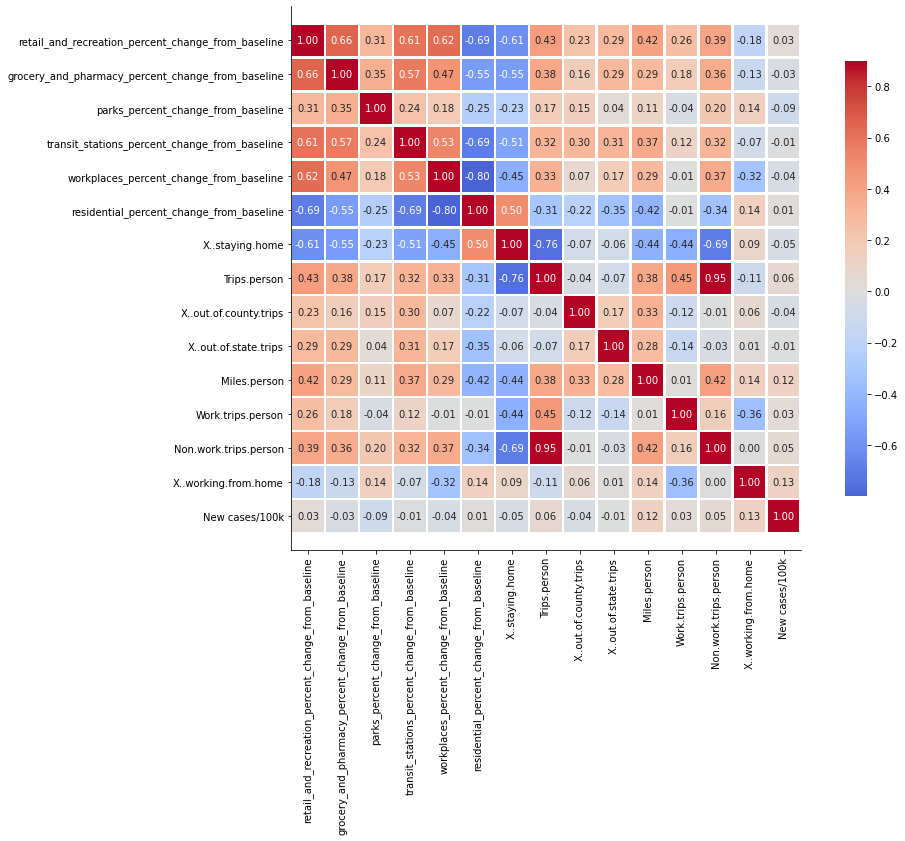

In [119]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [120]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [121]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

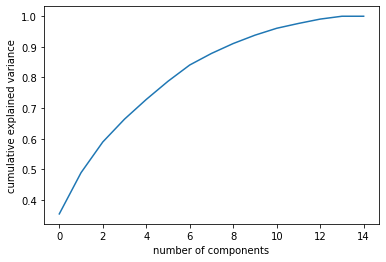

In [122]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [123]:
num_components = 12
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [124]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New cases/100k
0,0.363090,0.321845,0.154300,0.325521,0.313003,-0.346117,-0.355529,0.305201,0.104884,0.126199,0.249826,0.121642,0.296113,-0.074941,0.007521
1,0.090341,0.096429,0.116155,0.201663,0.124902,-0.242812,0.246546,-0.432735,0.337719,0.393073,0.108497,-0.432343,-0.332836,0.150248,-0.071911
2,-0.118968,-0.101327,0.160164,-0.062828,-0.258957,0.133061,-0.081217,0.184767,0.171675,-0.028508,0.364176,-0.261248,0.291490,0.649729,0.286718
3,0.027890,-0.124031,-0.641419,0.031114,-0.005463,-0.044890,0.000933,-0.034980,0.037043,0.280812,0.274961,0.147952,-0.088378,-0.152974,0.599375
4,-0.068921,-0.069236,-0.072579,-0.074527,0.427269,-0.242724,0.084898,0.021225,-0.620316,-0.036598,-0.131578,-0.498886,0.190526,0.078417,0.188999
5,0.175305,0.286307,0.442562,0.061937,-0.122163,0.035154,-0.017274,-0.162230,-0.233952,0.006045,-0.292561,0.246524,-0.261684,0.141300,0.596022
6,0.027147,-0.192344,0.074058,0.037051,0.277362,-0.132553,0.067427,-0.071955,0.452827,-0.707648,-0.023680,-0.111949,-0.041937,-0.175973,0.315514
7,-0.034220,-0.063562,0.434267,-0.440465,0.028520,0.151115,0.171984,0.134511,0.130371,0.336758,0.137323,-0.154457,0.200154,-0.537548,0.196810
8,0.159991,-0.358238,0.234000,-0.235250,0.146326,-0.160678,-0.019025,-0.176799,-0.303339,-0.107786,0.591023,0.300149,-0.295584,0.089831,-0.136569
9,-0.251380,-0.670047,0.243855,0.468599,0.000921,-0.170973,-0.005999,0.119358,0.020243,0.258507,-0.240992,0.177260,0.072522,-0.009756,0.056494


In [125]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [126]:
most_important_names

['retail_and_recreation_percent_change_from_baseline',
 'Trips.person',
 'X..working.from.home',
 'parks_percent_change_from_baseline',
 'X..out.of.county.trips',
 'New cases/100k',
 'X..out.of.state.trips',
 'X..working.from.home',
 'Miles.person',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'retail_and_recreation_percent_change_from_baseline']

In [127]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'X..staying.home',
       'Trips.person', 'X..out.of.county.trips', 'X..out.of.state.trips',
       'Miles.person', 'Work.trips.person', 'Non.work.trips.person',
       'X..working.from.home', 'New cases/100k'],
      dtype='object')
most_important_names:  ['retail_and_recreation_percent_change_from_baseline', 'Trips.person', 'X..working.from.home', 'parks_percent_change_from_baseline', 'X..out.of.county.trips', 'New cases/100k', 'X..out.of.state.trips', 'X..working.from.home', 'Miles.person', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'retail_and_recreation_percent_change_from_baselin

# Conclusion for superset dataset analysis:

From the above PCA analysis, we can drop the following columns from Time-series forecasting

1. Demographic Group:
>* 'X..people.older.than.60', 
>* 'Median.income', 
>* 'X..Male', 
>* 'New cases/100k',
>* 'FIPS', 
>* 'X..African.Americans', 
>* 'PopDensity'

2. Hospitalization and testing Group:
>* 'X..hospital.bed.utilization',
>* 'positivity_rate',
>* 'Ventilator.shortage',
>* 'positivity_rate',
>* 'Testing.capacity',
>* 'growth_code',
>* 'rolling_avg_new_cases/100k'

3. Mobility Group:
>* 'retail_and_recreation_percent_change_from_baseline',
>* 'Trips.person',
>* 'X..working.from.home',
>* 'parks_percent_change_from_baseline',
>* 'X..out.of.county.trips',
>* 'New cases/100k',
>* 'X..out.of.state.trips',
>* 'X..working.from.home',
>* 'Miles.person',
>* 'grocery_and_pharmacy_percent_change_from_baseline',
>* 'transit_stations_percent_change_from_baseline',
>* 'retail_and_recreation_percent_change_from_baseline'

# Applying for the whole dataset

## Standardizing the data

In [128]:
CA_superset_data.head(2)

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,State,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New cases/100k,positivity_rate,rolling_avg_new_cases/100k,growth_label,growth_code
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,California,6001,0,Alameda County,0.0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,California,CA,6001,Alameda County,6,37,26,2.93,25.4,0.4,36.8,0.25,2.68,0,1666753,-5.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0,0.0,37,54.0,0.0,0.0,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.0,0.0,0.0,0.0,minimal,0
2020-03-02,California,6001,0,Alameda County,0.0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,California,CA,6001,Alameda County,6,17,20,3.38,28.2,0.4,38.1,0.63,2.74,0,1666753,-2.9,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0,0.0,38,54.0,0.0,0.0,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.0,0.0,0.0,0.0,minimal,0


In [129]:
numeric_cols = ['FIPS','mask_rule_severity','m50_index','retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                'residential_percent_change_from_baseline','PopDensity','Social.distancing.index',
                'X..staying.home','Trips.person','X..out.of.county.trips',	'X..out.of.state.trips',
                'Miles.person',	'Work.trips.person','Non.work.trips.person','X..change.in.consumption',
                'Transit.mode.share','X..people.older.than.60',	'Median.income',	'X..African.Americans',
                'X..Hispanic.Americans',	'X..Male','Employment.density',	'X..hot.spots.1000.people',
                'Hospital.beds.1000.people',	'ICUs.1000.people',
                'New.cases.1000.people',	'Active.cases.1000.people',	'X.days..decreasing.COVID.cases',
                'X..hospital.bed.utilization',	'Testing.capacity',	'Tests.done.1000.people',	'X..ICU.utilization',
                'Ventilator.shortage',	'Imported.COVID.cases',	'COVID.exposure.1000.people',	'X.days..decreasing.ILI.cases',
                'Unemployment.claims.1000.people',	'Unemployment.rate',	'X..working.from.home',
                'Cumulative.inflation.rate'	,'COVID.death.rate','growth_code',
                'New cases/100k',	'positivity_rate',	'rolling_avg_new_cases/100k']

In [130]:
CA_superset_data_filtered = CA_superset_data[numeric_cols]

In [131]:
CA_superset_data_filtered.head(2)

,FIPS,mask_rule_severity,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,growth_code,New cases/100k,positivity_rate,rolling_avg_new_cases/100k
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,6001,0.0,58,6.0,9.0,15.0,1.0,4.0,0.0,860.757075,37,26,2.93,25.4,0.4,36.8,0.25,2.68,-5.1,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0,37,54.0,0.0,0.0,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.0,0,0.0,0.0,0.0
2020-03-02,6001,0.0,98,4.0,7.0,7.0,-1.0,3.0,0.0,860.757075,17,20,3.38,28.2,0.4,38.1,0.63,2.74,-2.9,15.04,19,92574,10.5,22.5,49.11,1155,131,2.05,0.22,0.0,0.0,38,54.0,0.0,0.0,0.0,0,0,0.05,35,1.1,5.3,5.7,0.6,0.0,0,0.0,0.0,0.0


In [132]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(15391, 49)
(15391, 49)


In [133]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [134]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

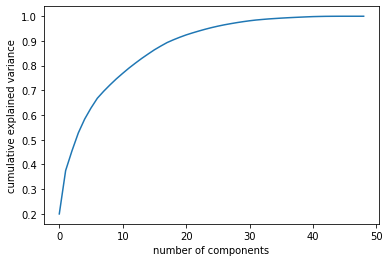

In [135]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [136]:
num_components = 30
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [137]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,FIPS,mask_rule_severity,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,growth_code,New cases/100k,positivity_rate,rolling_avg_new_cases/100k
0,-0.006128,0.236251,0.024395,0.170182,0.098266,0.051765,0.116577,0.114618,-0.142051,-0.097869,-0.187533,-0.175637,0.154313,0.031528,0.032876,0.181207,0.030310,0.160158,0.150368,-0.102031,0.004696,-0.107617,-0.024757,0.036278,0.037147,-0.108237,-0.068667,0.000000e+00,0.000000e+00,0.192043,0.220376,-0.038823,0.194359,-0.162929,0.249792,0.149365,0.152824,0.083307,0.243943,0.187122,-0.196345,-0.120600,0.078450,0.246967,-0.189399,0.207262,0.156930,-0.067936,0.202445
1,0.012749,0.096797,-0.058965,-0.216085,-0.216072,-0.098817,-0.214275,-0.209885,0.220779,0.163444,0.220653,0.232804,-0.190277,-0.041671,-0.077641,-0.095060,-0.115900,-0.171201,-0.171399,0.170340,-0.076234,0.173567,0.083119,0.009233,-0.044722,0.185885,0.063751,-0.000000e+00,-0.000000e+00,0.154056,0.197653,-0.134164,0.203097,-0.034377,0.154610,0.195083,0.193686,0.165801,0.171832,0.037943,0.021604,0.064693,0.130047,0.094358,-0.008053,0.154039,0.121023,-0.010175,0.166356
2,-0.024169,-0.186288,-0.050874,-0.053256,0.048007,-0.078942,0.069060,-0.062608,0.008845,-0.240502,0.021256,-0.061084,0.010437,-0.072236,-0.001620,-0.030548,0.068220,-0.011341,-0.104347,-0.261615,-0.134718,-0.216177,0.020416,0.218723,0.093398,-0.243366,-0.276991,0.000000e+00,0.000000e+00,0.162264,0.088175,-0.010549,0.114924,0.108164,-0.124852,0.203440,0.204516,0.002344,-0.069969,-0.260232,0.161773,0.298379,0.042099,-0.229627,0.249171,0.146925,0.137790,-0.017863,0.168951
3,-0.064742,0.007584,0.039876,0.064170,0.134559,0.170416,0.151498,0.026924,-0.151418,-0.047269,0.053924,0.073245,-0.224550,0.194443,0.245585,0.037599,-0.219902,-0.174194,-0.036561,-0.010826,0.403557,-0.056561,-0.232780,-0.349424,0.025031,-0.085964,0.294410,0.000000e+00,0.000000e+00,-0.043735,0.106487,-0.030856,0.100842,-0.061038,-0.012531,0.200829,0.177055,-0.100804,0.004834,-0.068040,0.026457,0.210219,0.157999,-0.058397,0.128503,-0.064023,-0.046009,-0.082775,-0.032275
4,-0.113707,-0.087950,0.018727,0.119819,0.019471,-0.167835,0.069287,0.161027,-0.144707,-0.011617,0.128476,0.113473,-0.217358,-0.006318,0.146594,-0.061974,0.095280,-0.271949,-0.239940,-0.018172,0.079304,-0.084817,-0.007725,-0.046742,0.194810,-0.033966,0.016948,-1.925930e-34,-1.203706e-35,0.136782,0.063284,0.265665,0.077002,0.269963,0.068408,-0.134479,-0.054400,-0.028677,0.110440,-0.120809,0.051992,-0.309766,-0.361521,0.044988,-0.229432,0.089910,0.118947,0.183003,0.145057
5,0.033948,-0.200403,0.101290,0.027521,0.146182,0.023115,-0.021202,0.000938,0.036370,0.276143,-0.189562,-0.081523,0.194781,0.070088,0.057516,0.032127,0.109416,0.178287,0.246958,0.274270,0.013326,0.132935,0.086578,-0.123242,0.042751,0.268732,0.158909,0.000000e+00,-1.540744e-33,0.102071,0.122148,0.186280,0.125943,0.051565,-0.129966,0.131890,0.189889,0.178978,-0.059501,-0.299890,-0.147414,0.062711,-0.254443,-0.197552,0.072503,0.026234,0.104330,0.098471,0.088299
6,-0.236575,0.060944,0.077918,0.064201,0.062939,

In [138]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [139]:
most_important_names

['Tests.done.1000.people',
 'X..staying.home',
 'Unemployment.rate',
 'X..people.older.than.60',
 'X..working.from.home',
 'X.days..decreasing.ILI.cases',
 'X..Male',
 'positivity_rate',
 'X..out.of.county.trips',
 'positivity_rate',
 'parks_percent_change_from_baseline',
 'Work.trips.person',
 'm50_index',
 'FIPS',
 'positivity_rate',
 'positivity_rate',
 'Imported.COVID.cases',
 'X..out.of.state.trips',
 'positivity_rate',
 'Miles.person',
 'X.days..decreasing.COVID.cases',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'New cases/100k',
 'transit_stations_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'Testing.capacity',
 'Testing.capacity',
 'retail_and_recreation_percent_change_from_baseline',
 'Unemployment.claims.1000.people',
 'growth_code']

## Conclusion


>* 'Tests.done.1000.people',
>* 'X..staying.home',
>* 'Unemployment.rate',
>* 'X..people.older.than.60',
>* 'X..working.from.home',
>* 'X.days..decreasing.ILI.cases',
>* 'X..Male',
>* 'positivity_rate',
>* 'X..out.of.county.trips',
>* 'positivity_rate',
>* 'parks_percent_change_from_baseline',
>* 'Work.trips.person',
>* 'm50_index',
>* 'FIPS',
>* 'positivity_rate',
>* 'positivity_rate',
>* 'Imported.COVID.cases',
>* 'X..out.of.state.trips',
>* 'positivity_rate',
>* 'Miles.person',
>* 'X.days..decreasing.COVID.cases',
>* 'grocery_and_pharmacy_percent_change_from_baseline',
>* 'New cases/100k',
>* 'transit_stations_percent_change_from_baseline',
>* 'transit_stations_percent_change_from_baseline',
>* 'Testing.capacity',
>* 'retail_and_recreation_percent_change_from_baseline',
>* 'Unemployment.claims.1000.people',
>* 'growth_code'

# Reference

* https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4